## **`PROYECTO INDIVIDUAL 02 - HENRY`**
---
### **Autor: Josue Huaman**

[LinkedIn](https://www.linkedin.com/imjosue/ "LinkedIn")

## Importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Leemos los datsets

In [31]:
df_test = pd.read_excel(
    '/Users/JVersace/Desktop/datathon/Datathon/E-Commerce_test.xlsx')
df_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


In [32]:
df_test.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210
1999,10999,D,Ship,2,5,155,5,low,F,6,1639


In [33]:
df_train = pd.read_excel(
    '/Users/JVersace/Desktop/datathon/Datathon/E-Commerce_train.xlsx')
df_train


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


#### Verificando datos duplicados

In [35]:
df_train[df_train.duplicated()]


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [36]:
df_train.duplicated(subset=['ID']).sum()
print('La cantidad de registros duplicados es:', df_train.duplicated().sum())


La cantidad de registros duplicados es: 0


#### **`1. Tratamiento de los valores faltantes`**
---

#### Para df_train

In [57]:
df_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Observamos no hay datos faltantes

#### para df_test

In [244]:
df_test.isnull().sum()


Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

Observamos no hay datos faltantes

In [ ]:
# Eliminamos la columna ID
df_test.drop(['ID'], axis=1, inplace=True)
df_test

In [ ]:
df_train.drop(['ID'], axis=1, inplace=True)
df_train

##### Para df_train

In [79]:
df_train['Mode_of_Shipment'].replace(to_replace=dict(Flight = 0, Road =1, Ship = 2 ) , inplace=True)
df_train['Warehouse_block'].replace(to_replace=dict(A=0, B=1, C=2, D=3, E=4, F=5), inplace=True)
df_train['Gender'].replace(to_replace=dict(F=0, M=1), inplace=True)
df_train['Product_importance'].replace(to_replace=dict(low=0, medium=1, high=2), inplace=True)

df_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,0,0,44,1233,1
1,2,5,0,4,5,216,2,0,1,59,3088,1
2,3,0,0,2,2,183,4,0,1,48,3374,1
3,4,1,0,3,3,176,4,1,1,10,1177,1
4,5,2,0,2,2,184,3,1,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,3,2,3,1,217,3,0,0,1,4177,1
8995,8996,5,2,5,3,232,3,1,1,3,4526,0
8996,8997,0,2,4,5,260,3,1,0,6,4221,0
8997,8998,1,2,4,2,184,3,1,0,5,5931,1


In [80]:
df_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,0,0,44,1233,1
1,2,5,0,4,5,216,2,0,1,59,3088,1
2,3,0,0,2,2,183,4,0,1,48,3374,1
3,4,1,0,3,3,176,4,1,1,10,1177,1
4,5,2,0,2,2,184,3,1,0,46,2484,1


##### **Corroboramos en graficos los datos faltantes**
----

In [81]:
import missingno as msno

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


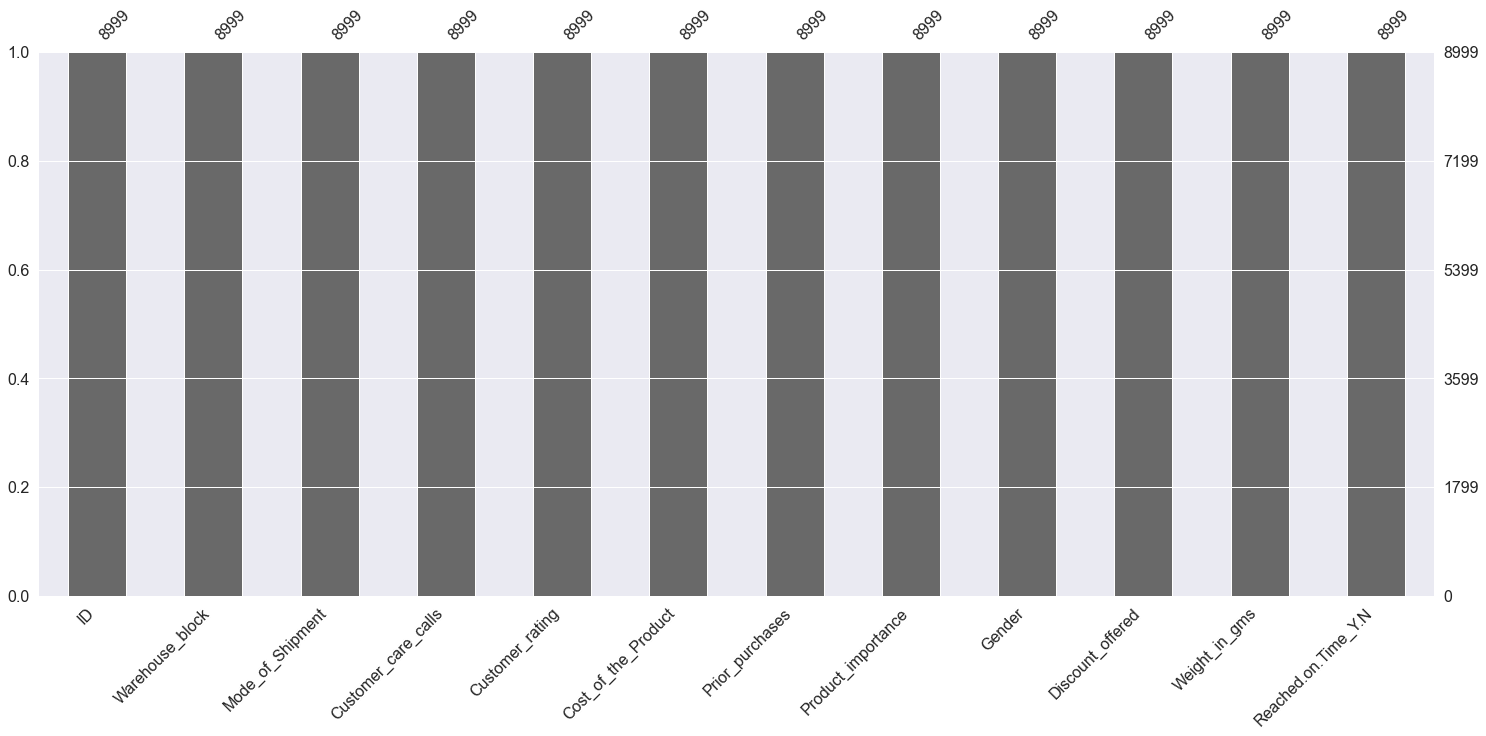

In [82]:
msno.bar(df_train)
plt.show()

<AxesSubplot:>

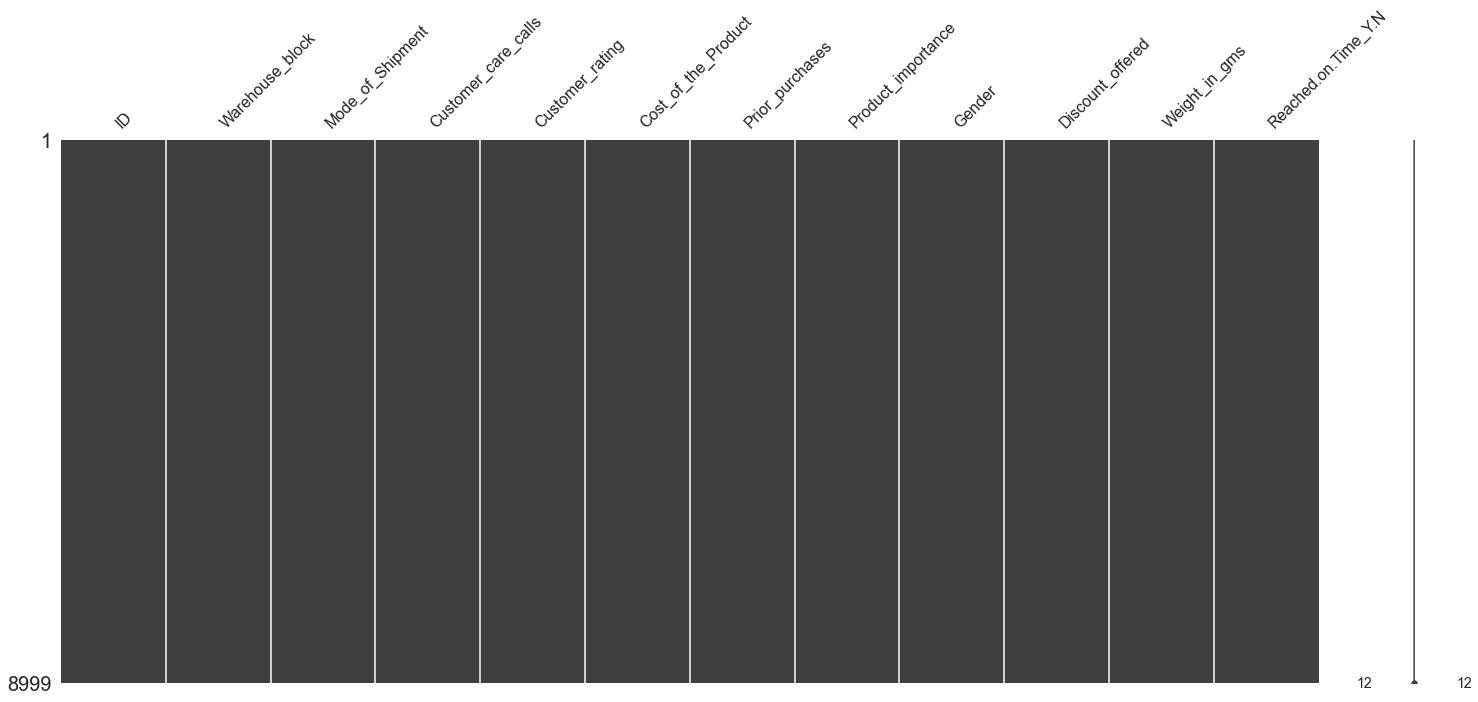

In [83]:
msno.matrix(df_train)


Observamos que efectivamente **no hay datos faltantes**

### **Reassign target** 
---
Asignaremos numeros a los datos



* Warehouse_block: A = 0, B = 1, C=2, D=3, E=4, F=5
* Mode shipment: Flight : 0, Road: 1, Ship:2
* Gender: F = 0, M = 1
* Product_importance: low = 0, medium =1, high=2

##### En **df_test**

In [245]:
df_test['Mode_of_Shipment'].replace(to_replace=dict(Flight = 0, Road =1, Ship = 2 ) , inplace=True)
df_test['Warehouse_block'].replace(to_replace=dict(A=0, B=1, C=2, D=3, E=4, F=5), inplace=True)
df_test['Gender'].replace(to_replace=dict(F=0, M=1), inplace=True)
df_test['Product_importance'].replace(
    to_replace=dict(low=0, medium=1, high=2), inplace=True)

df_test


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,5,2,5,1,189,2,1,1,10,5248
1,3,2,5,3,150,2,2,0,9,4446
2,5,2,3,3,200,3,0,1,3,5739
3,0,2,5,1,133,2,1,1,1,4643
4,1,2,4,2,260,3,0,1,4,5504
...,...,...,...,...,...,...,...,...,...,...
1995,0,2,4,1,252,5,1,0,1,1538
1996,1,2,4,1,232,5,1,0,6,1247
1997,2,2,5,4,242,5,0,0,4,1155
1998,5,2,5,2,223,6,1,1,2,1210


In [84]:
cleaned_data = df_train.copy()


In [137]:
cleaned_data


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,0,0,44,1233,1
1,5,0,4,5,216,2,0,1,59,3088,1
2,0,0,2,2,183,4,0,1,48,3374,1
3,1,0,3,3,176,4,1,1,10,1177,1
4,2,0,2,2,184,3,1,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
8994,3,2,3,1,217,3,0,0,1,4177,1
8995,5,2,5,3,232,3,1,1,3,4526,0
8996,0,2,4,5,260,3,1,0,6,4221,0
8997,1,2,4,2,184,3,1,0,5,5931,1


### **Outliers**
---


<AxesSubplot:>

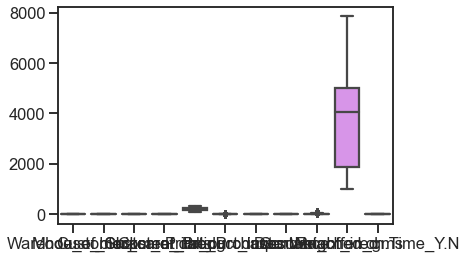

In [138]:
sns.boxplot(data=cleaned_data)


<AxesSubplot:>

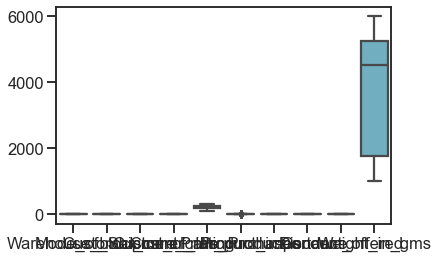

In [246]:
sns.boxplot(data=df_test)


<AxesSubplot:xlabel='Cost_of_the_Product'>

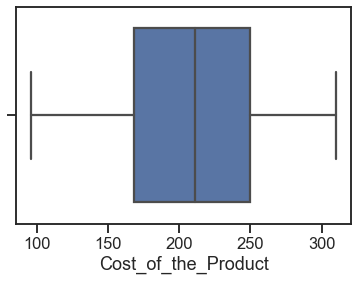

In [139]:
sns.boxplot(data=df_train, x='Cost_of_the_Product')


##### Vemos que **No hay outliers**

## **`2. Exploratory Data Analysis`¶**
---

#### **Graficaremos la correlacion que existe entre los datos**

<AxesSubplot:>

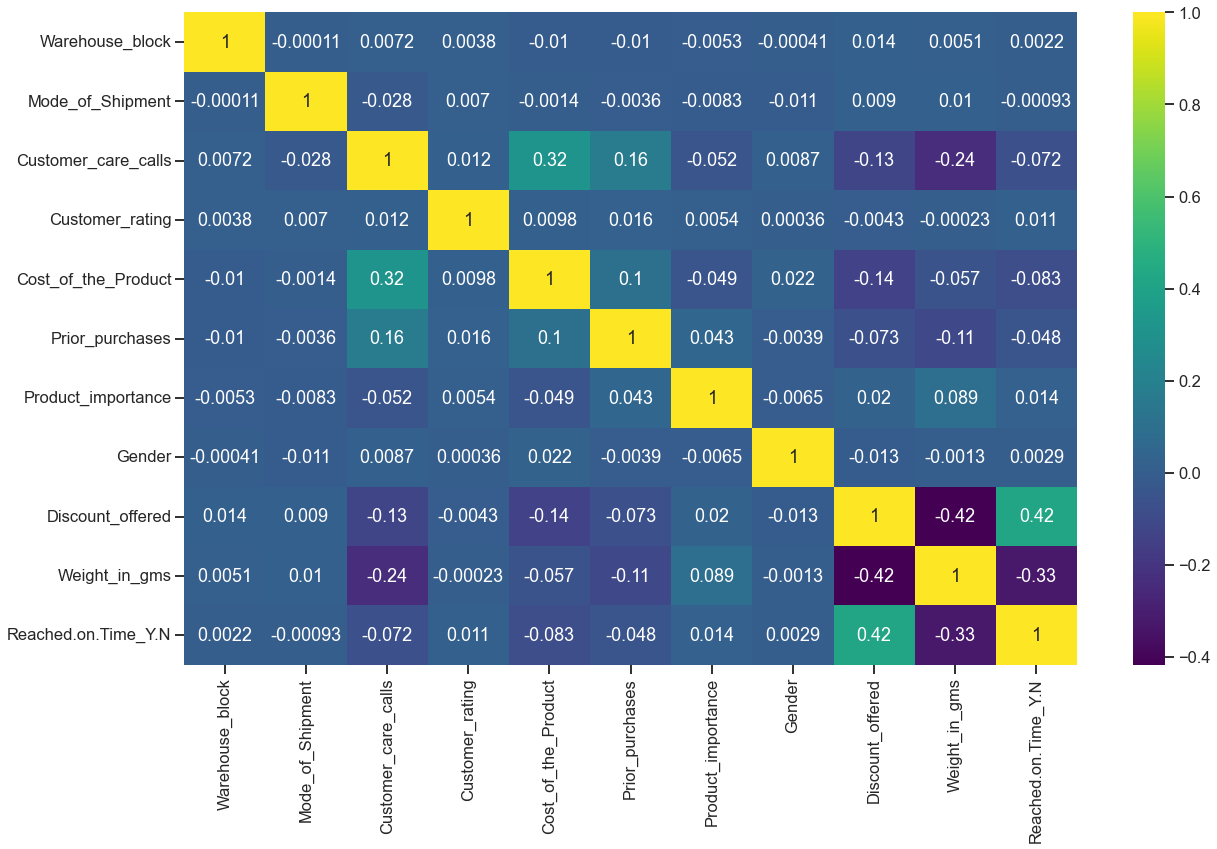

In [141]:
plt.figure(figsize=(20,12))
sns.heatmap(cleaned_data.corr(),annot=True,cmap='viridis')

#### Podemos deducir que:
* Hay una correlacion positiva entre las columnas **Discount_offered** y  **Reached.on.Time_Y.N**. Esto puede estar relacionado a que se ponía mas empeño en entregar mas rapido en campañas comerciales.
* **Cost_of_the_Product** Tiene alguna relacion con **Customer_care_calls**. Puede deberse a que los clientes prestan mas cuidado cuando es mas caro el producto.
* **Customer_care_calls** tambien tiene alguna relacion con **Prior_purchase**. La prioridad  tambien influye en las llamadas

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Customer_care_calls'>

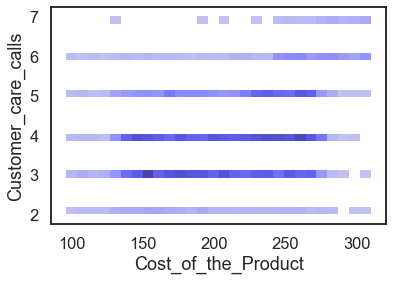

In [143]:
sns.set_style('white')
sns.histplot(data=cleaned_data,x='Cost_of_the_Product',y='Customer_care_calls',color='darkblue')

#### Las llamadas al centro de atencion ocurren entre 3 o 4 veces en su mayoria Productos en un rango de 140 - 260

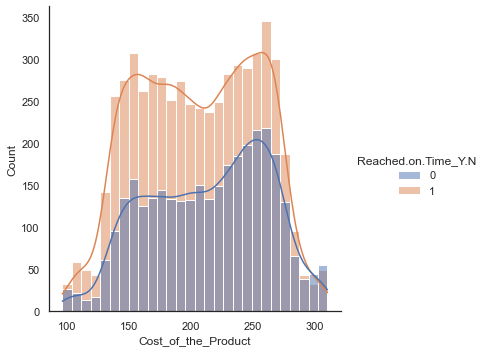

In [99]:
sns.displot(data=df_train,x='Cost_of_the_Product',hue='Reached.on.Time_Y.N',kde=True)

#### A simple vista, al parecer, mientras mas caro el producto, llegará mas rapido tu pedido

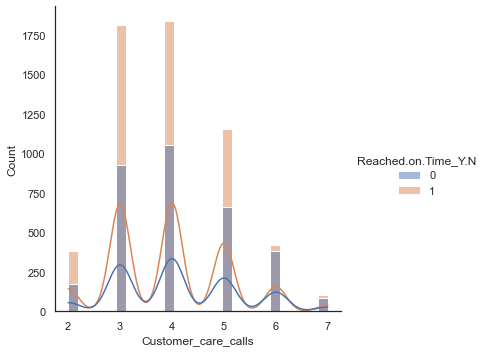

In [105]:
sns.displot(data=df_train,x='Customer_care_calls',hue='Reached.on.Time_Y.N',kde=True)

#### Segun el grafico, no parece haber relacion si llamaas o no, tu producto no llegará necesariamente a tiempo.

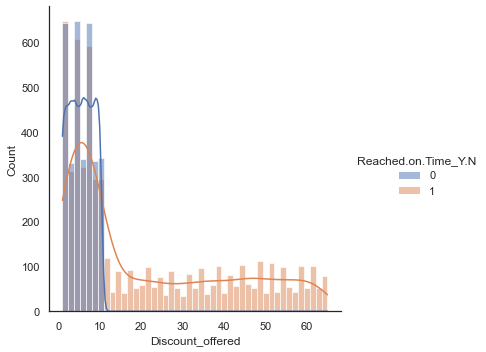

In [98]:
sns.displot(data=df_train,x='Discount_offered',hue='Reached.on.Time_Y.N',kde=True)

In [ ]:
sns.displot(data=cleaned_data, x='Discount_offered', hue='Outcome', kind='kde')


#### Hay mas relacion entre el tiempo de llegada y el descuento ofrecido. Puede que se deba a que los descuentos ofrecidos sean en campañas publicitarias.

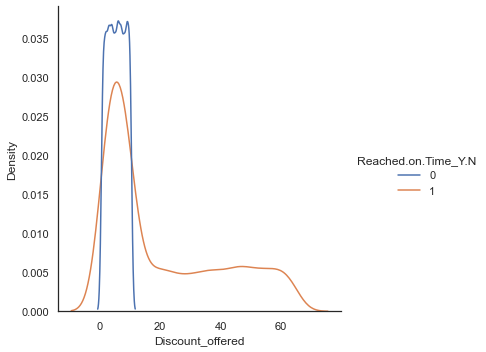

In [107]:
sns.displot(data=cleaned_data, x='Discount_offered',
            hue='Reached.on.Time_Y.N', kind='kde')


Las personas a quienes no les esta llegando a tiempo son los que estan comprando productos con menos descuento

<AxesSubplot:xlabel='Discount_offered', ylabel='Cost_of_the_Product'>

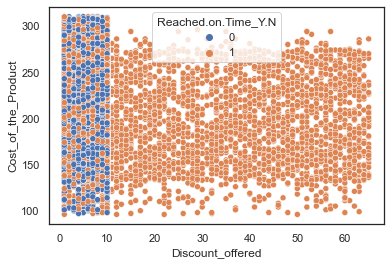

In [110]:
sns.scatterplot(data=cleaned_data, x='Discount_offered',
                y='Cost_of_the_Product', hue='Reached.on.Time_Y.N')


#### El descuento ofrecido es causa que el producto llegue a tiempo o no.
##### Es suficiente para avanzar con las Metricas

## `3. Metricas`
---

## Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [306]:
X = cleaned_data.drop('Reached.on.Time_Y.N', axis=1)  # predictor variables
y = cleaned_data['Reached.on.Time_Y.N']  # outcome variable


In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

In [308]:
sm = SMOTE(random_state=42)  # initalize SMOTE
x_res, y_res = sm.fit_resample(X_train, y_train)  # Oversample our data.


In [309]:
#select best params
from sklearn.model_selection import GridSearchCV
estimator = Pipeline([("scaler", StandardScaler()),
        ("logistic_regression", LogisticRegression(solver='liblinear'))])

params = {'logistic_regression__penalty' : ['l1','l2'],
    'logistic_regression__C': np.linspace(0.001,100)
}
grid = GridSearchCV(estimator, params, cv=5,verbose=True,n_jobs=-1,scoring='recall')

In [310]:
grid.fit(x_res,y_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logistic_regression__C': array([1.00000000e-03, 2.04179592e+00, 4.08259184e+00, 6.12338776e+00,
       8.16418367e+00, 1.02049796e+01, 1.22457755e+01, 1.42865714e+01,
       1.63273673e+01, 1.83681633e+01, 2.0408959...
       5.71432857e+01, 5.91840816e+01, 6.12248776e+01, 6.32656735e+01,
       6.53064694e+01, 6.73472653e+01, 6.93880612e+01, 7.14288571e+01,
       7.34696531e+01, 7.55104490e+01, 7.75512449e+01, 7.95920408e+01,
       8.16328367e+01, 8.36736327e+01, 8.57144286e+01, 8.77552245e+01,
       8.97960204e+01, 9.18368163e+01, 9.38776122e+01, 9.59184082e+01,
       9.79592041e+01, 1.00000000e+02]),
                         'logistic_regression__penalty': ['l1', 'l2']},
             scoring='recall', verbose=True)

In [119]:
grid.best_params_


{'logistic_regression__C': 6.123387755102041,
 'logistic_regression__penalty': 'l1'}

In [120]:
y_pred = grid.predict(X_test)


In [121]:
from sklearn.metrics import confusion_matrix, classification_report


Text(0.5, 84.5, 'Ground Truth')

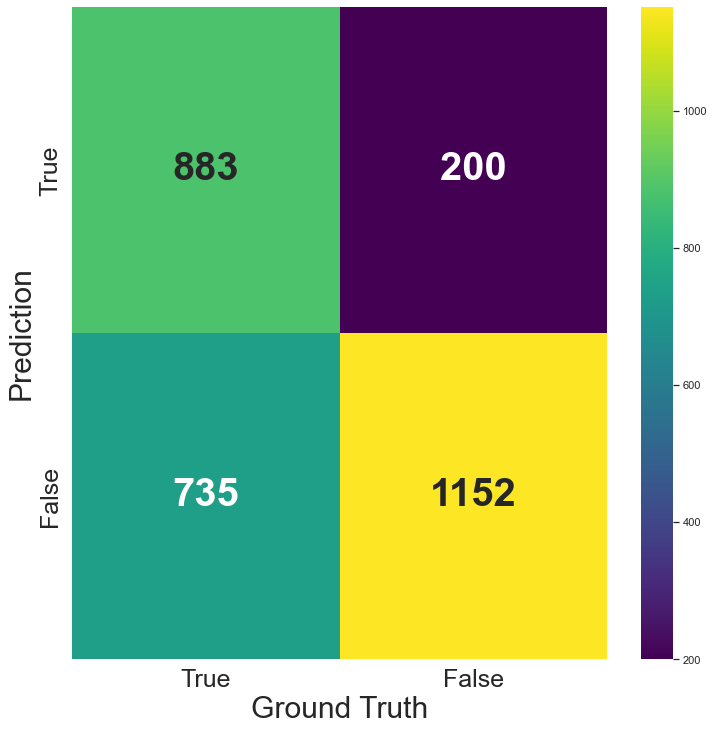

In [122]:
#plot the confusion matrix
_, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
                 fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels, fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)


In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.82      0.65      1083
           1       0.85      0.61      0.71      1887

    accuracy                           0.69      2970
   macro avg       0.70      0.71      0.68      2970
weighted avg       0.74      0.69      0.69      2970



un recall de 0.82 no es malo

## KNN
---

In [160]:
from sklearn.neighbors import KNeighborsClassifier


In [161]:
se = StandardScaler()  # we need to scale our data for knn
X_scaled = se.fit_transform(X)


In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, stratify=y, random_state=42)


In [163]:
sm = SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(X_train,y_train)

In [164]:
#Para optimizar el valor de K

from sklearn.metrics import recall_score, f1_score
max_k = 40
recall_scores = list()
f1_scores = list()
for k in range(1, max_k):

    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(x_res, y_res)

    y_pred = knn.predict(X_test)
    r = recall_score(y_pred, y_test)
    recall_scores.append((k, round(recall_score(y_test, y_pred), 4)))
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))

r_results = pd.DataFrame(recall_scores, columns=['K', 'Recall'])
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1'])


<Figure size 1800x1200 with 0 Axes>

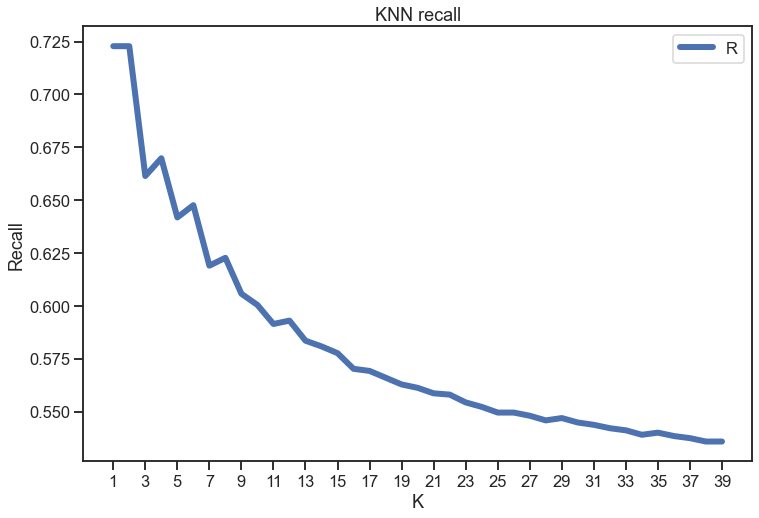

In [129]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = r_results.set_index('K').plot(figsize=(12, 8), linewidth=6)
ax.set(xlabel='K', ylabel='Recall')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN recall')
plt.legend(labels='R')


<Figure size 1800x1200 with 0 Axes>

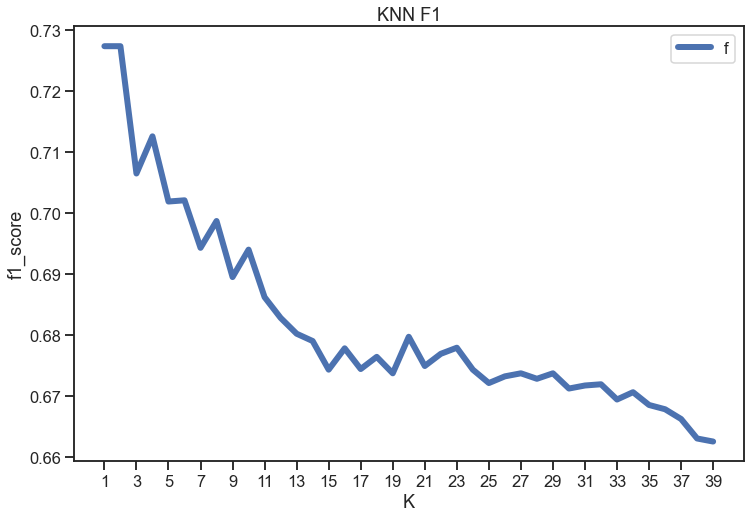

In [165]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 8), linewidth=6)
ax.set(xlabel='K', ylabel='f1_score')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN F1')
plt.legend(labels='f1_score')


De ambos, Recall y F1. Podemoms ver que k=3 es optimo 

Text(0.5, 76.5, 'Ground Truth')

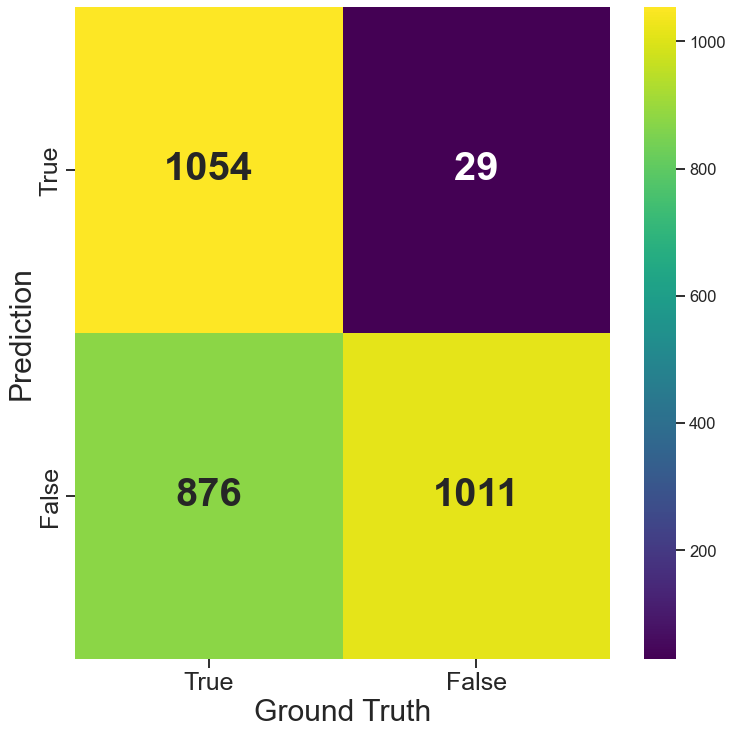

In [150]:
_, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
                 fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels, fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION


In [166]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(x_res, y_res)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.69      0.59      1083
           1       0.78      0.64      0.71      1887

    accuracy                           0.66      2970
   macro avg       0.65      0.67      0.65      2970
weighted avg       0.69      0.66      0.67      2970



KNN nos da un un RECALL de 69%

## SVC
---

Optimizaremos en los siguientes 2 modelos nuestro f1 score y ver los resultados.

In [219]:
from sklearn.svm import LinearSVC


In [220]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=42)


In [169]:
sm = SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(X_train,y_train)

In [221]:
from sklearn.model_selection import GridSearchCV
estimator = Pipeline([("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(dual=False))])

params = {
    'linear_svc__C': np.linspace(0.001,100)
}
grid = GridSearchCV(estimator, params, cv=5,verbose=True,n_jobs=-1,scoring='f1')

In [222]:
grid.fit(x_res, y_res)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear_svc', LinearSVC(dual=False))]),
             n_jobs=-1,
             param_grid={'linear_svc__C': array([1.00000000e-03, 2.04179592e+00, 4.08259184e+00, 6.12338776e+00,
       8.16418367e+00, 1.02049796e+01, 1.22457755e+01, 1.42865714e+01,
       1.63273673e+01, 1.83681633e+01, 2.04089592e+01, 2.24497551e+01,
       2.44905510e+01...
       5.71432857e+01, 5.91840816e+01, 6.12248776e+01, 6.32656735e+01,
       6.53064694e+01, 6.73472653e+01, 6.93880612e+01, 7.14288571e+01,
       7.34696531e+01, 7.55104490e+01, 7.75512449e+01, 7.95920408e+01,
       8.16328367e+01, 8.36736327e+01, 8.57144286e+01, 8.77552245e+01,
       8.97960204e+01, 9.18368163e+01, 9.38776122e+01, 9.59184082e+01,
       9.79592041e+01, 1.00000000e+02])},
             scoring='f1', verbose=True)

In [223]:
grid.best_params_


{'linear_svc__C': 2.0417959183673466}

In [180]:
y_pred = grid.predict(X_test)


Text(0.5, 76.5, 'Ground Truth')

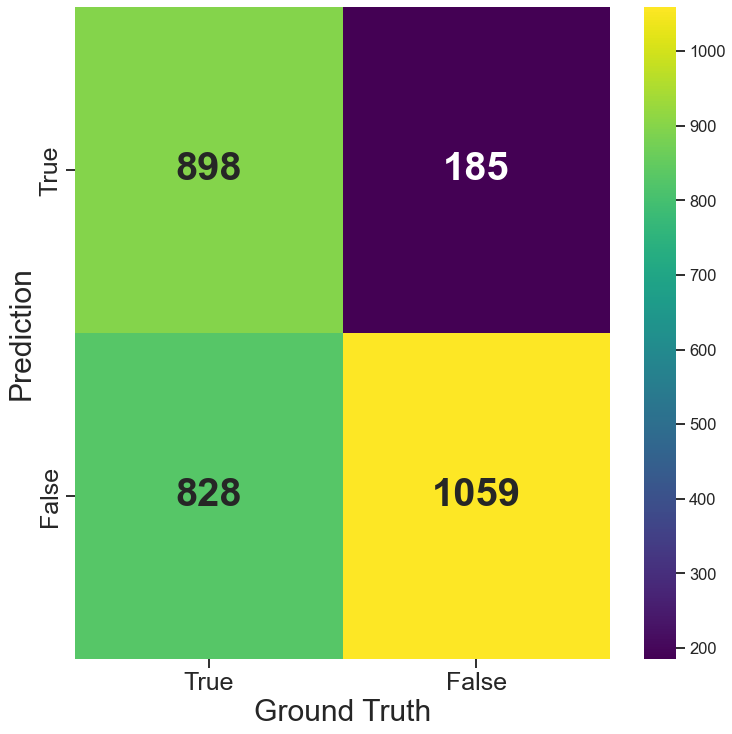

In [181]:
_, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
                 fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels, fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION


In [182]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.83      0.64      1083
           1       0.85      0.56      0.68      1887

    accuracy                           0.66      2970
   macro avg       0.69      0.70      0.66      2970
weighted avg       0.73      0.66      0.66      2970



Similar a Logistic Regression 0.83

## Random Forest
---

In [183]:
from sklearn.ensemble import RandomForestClassifier


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)

In [185]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(X_train, y_train)


In [190]:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier(n_estimators=300)

params = { 'max_depth' : range(5,20),
          'min_samples_split' : np.arange(2,10)
}
grid = GridSearchCV(estimator, params, cv=5,verbose=True,n_jobs=-1,scoring='f1')

In [191]:
grid.fit(x_res,y_res)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=300),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1', verbose=True)

In [192]:
y_pred = grid.predict(X_test)


Text(0.5, 76.5, 'Ground Truth')

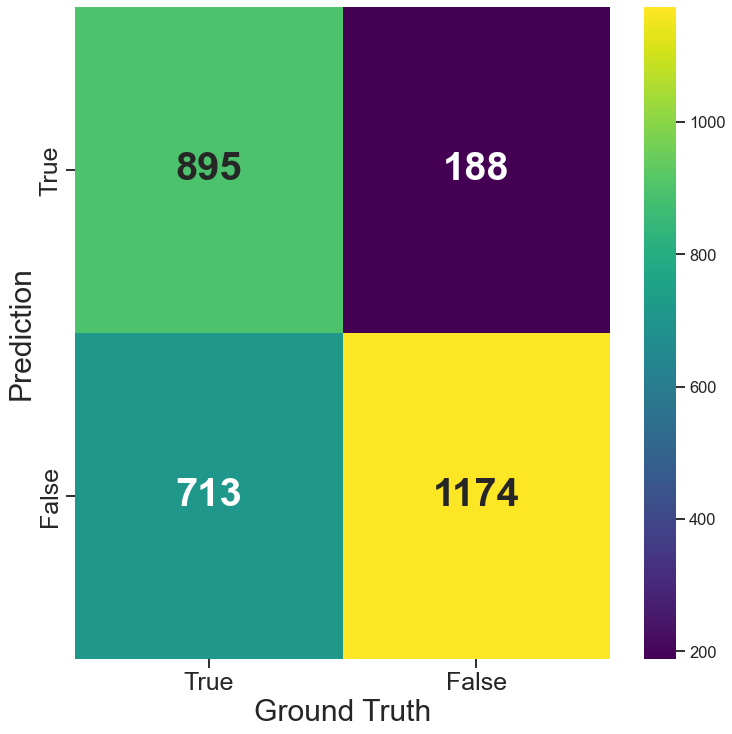

In [193]:
_, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
                 fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels, fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION


In [194]:
grid.best_params_


{'max_depth': 19, 'min_samples_split': 5}

In [195]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.83      0.67      1083
           1       0.86      0.62      0.72      1887

    accuracy                           0.70      2970
   macro avg       0.71      0.72      0.69      2970
weighted avg       0.75      0.70      0.70      2970



#### De nuevo vemos que comparado a los otros modelos, no hay ninguna o poca mejora.

## Combinando los models
---
Vamos a combinar todos nuestros modelos para ver el rendimiento de ellos y ver que tan bien funcionan

In [196]:
from sklearn.ensemble import VotingClassifier


In [233]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C=6.123387755102041)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
svc = LinearSVC(penalty='l2',C=0.001)
rf = RandomForestClassifier(max_depth=8, min_samples_split=2,n_estimators=300)

In [234]:
eclf = VotingClassifier(estimators=[('clf1',lr),('clf2',knn),('clf3',svc),('clf4',rf)])

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42,stratify=y)

In [236]:
sm = SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(X_train,y_train)

In [237]:
eclf.fit(x_res,y_res)

VotingClassifier(estimators=[('clf1',
                              LogisticRegression(C=6.123387755102041,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('clf2',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance')),
                             ('clf3', LinearSVC(C=0.001)),
                             ('clf4',
                              RandomForestClassifier(max_depth=8,
                                                     n_estimators=300))])

In [238]:
y_pred = eclf.predict(X_test)


Text(0.5, 76.5, 'Ground Truth')

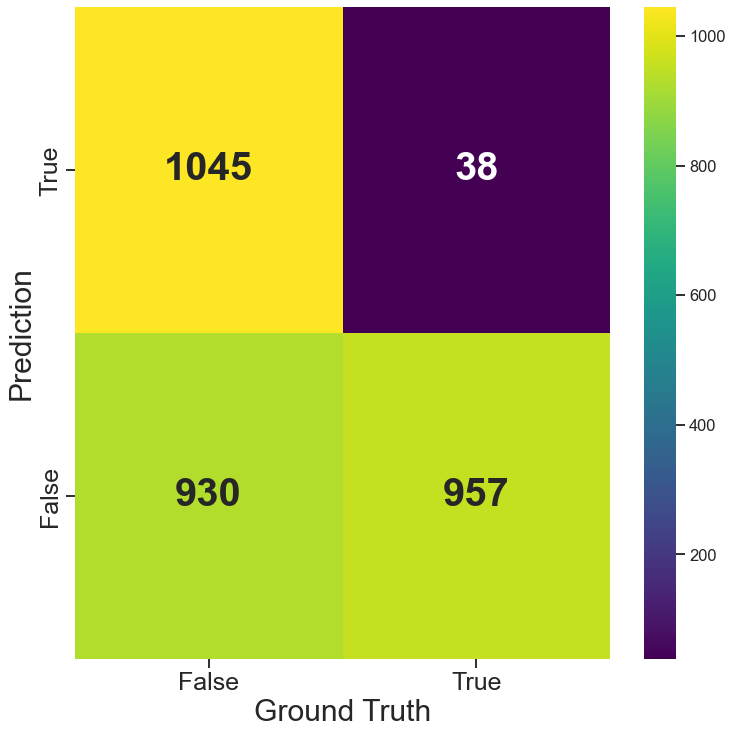

In [239]:
_, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
                 fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION


In [240]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.96      0.68      1083
           1       0.96      0.51      0.66      1887

    accuracy                           0.67      2970
   macro avg       0.75      0.74      0.67      2970
weighted avg       0.80      0.67      0.67      2970



## **Conclusion**
---

Todos los modelos tienen un rendimiento minimo desde 0.69 (KNN), pero en el resto tiene un promedio de 0.83, que no es nada malo considerando el tamaño de los datos. Pero combinando los modelos, tenemos un rendimiento de 0.96. La cual usaremos para nuestra prediccion

Sin embargo, tal vez el empleo de métodos no supervisados, como el agrupamiento, podría revelar más información y ayudarnos a mejorar nuestros puntajes.

Otros métodos de muestreo podrían haber arrojado mejores resultados.



## `4. Prediccion en nuestro Dataset`
---

#### Probaremos la combinacion de nuestros modelos con el Dataset de Testeo : E-Commerce_test (Previamente ya tratado) con Random Forest, debido a que la probabilidad para 'a tiempo' y 'no a tiempo' es el mas aceptable

In [248]:
df_test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,5,2,5,1,189,2,1,1,10,5248
1,3,2,5,3,150,2,2,0,9,4446
2,5,2,3,3,200,3,0,1,3,5739
3,0,2,5,1,133,2,1,1,1,4643
4,1,2,4,2,260,3,0,1,4,5504
...,...,...,...,...,...,...,...,...,...,...
1995,0,2,4,1,252,5,1,0,1,1538
1996,1,2,4,1,232,5,1,0,6,1247
1997,2,2,5,4,242,5,0,0,4,1155
1998,5,2,5,2,223,6,1,1,2,1210


In [312]:
clf = RandomForestClassifier(
    n_estimators=300, max_features='sqrt', n_jobs=-1, oob_score=True, random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=42)

In [317]:
y_test_pred = clf.predict(df_test)


In [320]:
josueversace = pd.DataFrame(y_test_pred)


In [321]:
josueversace.to_csv('josueversace.csv', index=False)


In [322]:
#agregar nombre de columna al archivo josueversace
josueversace.columns = ['pred']
josueversace.to_csv('josueversace.csv',index=False)

---

---